In [164]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline

In [165]:
x = 6*np.random.rand(200,1)-3
y = 0.8*x**2 + 0.9*x +2 + np.random.randn(200,1)
# y = 0.8x^2 + 0.9x +2

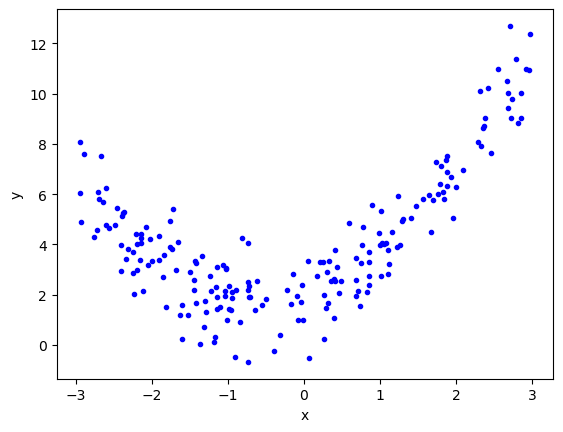

In [166]:
plt.plot(x,y,'b.') # b is color blue and . is marker
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [167]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state = 2)

In [168]:
# apply linear regression
lr = LinearRegression()

In [169]:
lr.fit(x_train,y_train)

LinearRegression()

In [170]:
y_pred = lr.predict(x_test)

In [171]:
r2_score(y_test,y_pred)

0.22294985582800908

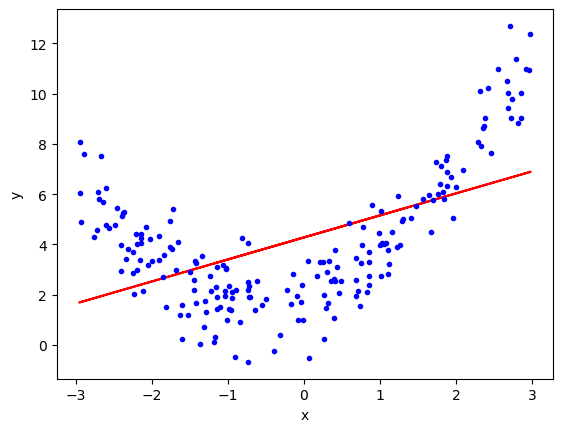

In [172]:
plt.plot(x_train,lr.predict(x_train),color = 'r')
plt.plot(x,y,"b.")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [173]:
# applying polynomial regression
# degree 2

ply = PolynomialFeatures(degree = 2,include_bias = True)

In [174]:
x_train_trans = ply.fit_transform(x_train)
x_test_trans = ply.transform(x_test)

In [175]:
print(x_train[0])
print(x_train_trans[0])

[1.29974872]
[1.         1.29974872 1.68934673]


In [176]:
lr = LinearRegression()

In [177]:
lr.fit(x_train_trans,y_train)

LinearRegression()

In [178]:
y_pred = lr.predict(x_test_trans)

In [179]:
r2_score(y_test,y_pred)

0.8368335225719066

In [180]:
print(lr.coef_)

[[0.         0.89651134 0.82364385]]


In [181]:
print(lr.intercept_)

[1.99784596]


In [182]:
x_new = np.linspace(-3,3,200).reshape(200,1)
x_new_ply = ply.transform(x_new)
y_new = lr.predict(x_new_ply)

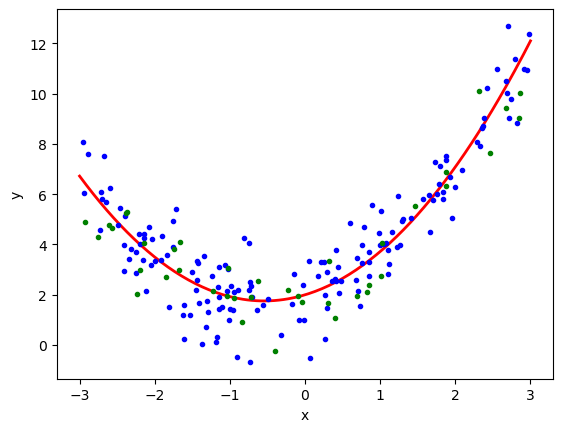

In [183]:
plt.plot(x_new,y_new,"r-",linewidth = 2, label ="predictions" )
plt.plot(x_train,y_train,"b.",label = 'Training points')
plt.plot(x_test,y_test,"g.",label = 'testing points')
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [184]:
def polynomial_regression(degree):
    X_new=np.linspace(-3, 3, 100).reshape(100, 1)
    X_new_poly = ply.transform(X_new)

    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    polynomial_regression.fit(x, y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig,'r', label="Degree " + str(degree), linewidth=2)

    plt.plot(x_train, y_train, "b.", linewidth=3)
    plt.plot(x_test, y_test, "g.", linewidth=3)
    plt.legend(loc="upper left")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.axis([-3, 3, 0, 10])
    plt.show()

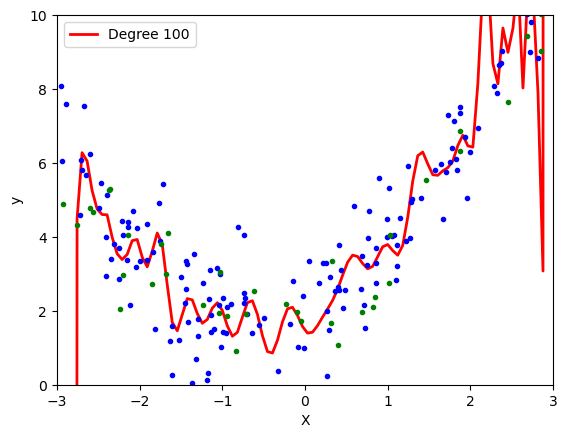

In [185]:
polynomial_regression(100)

In [186]:
ply.powers_

array([[0],
       [1],
       [2]], dtype=int64)

C:\Users\abc\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



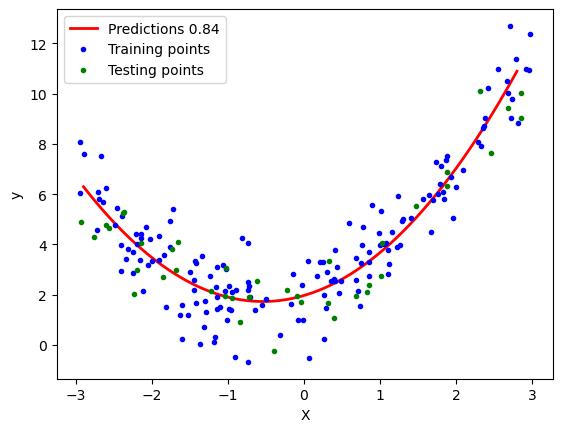

In [187]:
# Applying Gradient Descent

poly = PolynomialFeatures(degree=2)

X_train_trans = poly.fit_transform(x_train)
X_test_trans = poly.transform(x_test)

sgd = SGDRegressor(max_iter=100)
sgd.fit(x_train_trans,y_train)

X_new=np.linspace(-2.9, 2.8, 200).reshape(200, 1)
X_new_poly = poly.transform(X_new)
y_new = sgd.predict(X_new_poly)

y_pred = sgd.predict(X_test_trans)

plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions " + str(round(r2_score(y_test,y_pred),2)))
plt.plot(x_train, y_train, "b.",label='Training points')
plt.plot(x_test, y_test, "g.",label='Testing points')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

In [188]:
# 3d polynomial features
x  = 7*np.random.rand(100,1) - 2.8
y = 7*np.random.rand(100,1) - 2.8
z = x**2 + y**2 +0.2*x +0.2*y +0.1*x*y +np.random.randn(100,1)

In [189]:
import plotly.express as px
df = px.data.iris()
fig = px.scatter_3d(df, x=x.ravel(), y=y.ravel(), z=z.ravel())
fig.show()


In [190]:
lr = LinearRegression()

In [191]:
lr.fit(np.array([x,y]).reshape(100,2),z)

LinearRegression()

In [192]:
x_input = np.linspace(x.min(),x.max(),10)
y_input = np.linspace(y.min(),y.max(),10)
xGrid,yGrid = np.meshgrid(x_input,y_input)

final = np.vstack((xGrid.ravel().reshape(1,100),yGrid.ravel().reshape(1,100))).T

z_final  = lr.predict(final).reshape(10,10)

In [193]:
import plotly.graph_objects as go
fig = px.scatter_3d(df,x = x.ravel(),y = y.ravel(),z = z.ravel())
fig.add_trace(go.Surface(x=x_input,y = y_input, z = z_final))
fig.show()

In [194]:
x_multi = np.array([x,y]).reshape(100,2)
x_multi.shape

(100, 2)

In [219]:
poly = PolynomialFeatures(degree = 30)

In [220]:
x_multi_trans = poly.fit_transform(x_multi)

In [221]:
# print("Input",poly.n_input_features_)
print("Ouput",poly.n_output_features_)
print("Powers\n",poly.powers_)

Ouput 496
Powers
 [[ 0  0]
 [ 1  0]
 [ 0  1]
 [ 2  0]
 [ 1  1]
 [ 0  2]
 [ 3  0]
 [ 2  1]
 [ 1  2]
 [ 0  3]
 [ 4  0]
 [ 3  1]
 [ 2  2]
 [ 1  3]
 [ 0  4]
 [ 5  0]
 [ 4  1]
 [ 3  2]
 [ 2  3]
 [ 1  4]
 [ 0  5]
 [ 6  0]
 [ 5  1]
 [ 4  2]
 [ 3  3]
 [ 2  4]
 [ 1  5]
 [ 0  6]
 [ 7  0]
 [ 6  1]
 [ 5  2]
 [ 4  3]
 [ 3  4]
 [ 2  5]
 [ 1  6]
 [ 0  7]
 [ 8  0]
 [ 7  1]
 [ 6  2]
 [ 5  3]
 [ 4  4]
 [ 3  5]
 [ 2  6]
 [ 1  7]
 [ 0  8]
 [ 9  0]
 [ 8  1]
 [ 7  2]
 [ 6  3]
 [ 5  4]
 [ 4  5]
 [ 3  6]
 [ 2  7]
 [ 1  8]
 [ 0  9]
 [10  0]
 [ 9  1]
 [ 8  2]
 [ 7  3]
 [ 6  4]
 [ 5  5]
 [ 4  6]
 [ 3  7]
 [ 2  8]
 [ 1  9]
 [ 0 10]
 [11  0]
 [10  1]
 [ 9  2]
 [ 8  3]
 [ 7  4]
 [ 6  5]
 [ 5  6]
 [ 4  7]
 [ 3  8]
 [ 2  9]
 [ 1 10]
 [ 0 11]
 [12  0]
 [11  1]
 [10  2]
 [ 9  3]
 [ 8  4]
 [ 7  5]
 [ 6  6]
 [ 5  7]
 [ 4  8]
 [ 3  9]
 [ 2 10]
 [ 1 11]
 [ 0 12]
 [13  0]
 [12  1]
 [11  2]
 [10  3]
 [ 9  4]
 [ 8  5]
 [ 7  6]
 [ 6  7]
 [ 5  8]
 [ 4  9]
 [ 3 10]
 [ 2 11]
 [ 1 12]
 [ 0 13]
 [14  0]
 [13  1]
 [12  2]
 [11  3]
 

In [222]:
x_multi_trans.shape

(100, 496)

In [223]:
lr = LinearRegression()

In [224]:
lr.fit(x_multi_trans,z)

LinearRegression()

In [225]:
x_test_multi = poly.transform(final)

In [226]:
z_final = lr.predict(x_multi_trans).reshape(10,10)


In [227]:
fig = px.scatter_3d(x=x.ravel(), y=y.ravel(), z=z.ravel())

fig.add_trace(go.Surface(x = x_input, y = y_input, z =z_final))

fig.update_layout(scene = dict(zaxis = dict(range=[0,35])))

fig.show()